In [1]:
import scanpy as sc
import muon as mu
import matplotlib.pyplot as plt

In [ ]:
mdata = mu.read_h5mu("../datasets/multiome/cite_BMMC_s1_500.h5mu")
mdata

/home/zyuan/.conda/envs/mamba/lib/python3.10/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/home/zyuan/.conda/envs/mamba/lib/python3.10/site-packages/mudata/_core/mudata.py:931: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(
/home/zyuan/.conda/envs/mamba/lib/python3.10/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more

MuData object with n_obs × n_vars = 11126 × 14087
  obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
  2 modalities
    rna:	11126 x 13953
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
      var:	'feature_types', 'gene_id'
      uns:	'dataset_id', 'genome', 'organism'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'counts'
    adt:	11126 x 134
      obs:	'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
      var:	'feature_types', 'gene_id'
      uns:	'dataset_id', 'genome', 'organism'
      obsm:	'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
      layers:	'counts'

In [4]:
adata = mdata['rna'].copy()
adata

AnnData object with n_obs × n_vars = 11126 × 13953
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id'
    uns: 'dataset_id', 'genome', 'organism'
    obsm: 'ADT_X_pca', 'ADT_X_umap', 'ADT_isotype_controls', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [5]:
reference = adata[adata.obs['batch'].isin(['s1d1'])].copy()
query = adata[~adata.obs['batch'].isin(['s1d1'])].copy()

In [7]:
reference.write("../datasets/multiome/cite_BMMC_s1_500_rna_reference.h5ad")
query.write("../datasets/multiome/cite_BMMC_s1_500_rna_query.h5ad")

In [3]:
adata = sc.read_h5ad("../results/annotation/cite_BMMC_s1_500_2batchsize64/adata_prediction.h5ad")
adata

AnnData object with n_obs × n_vars = 11126 × 64
    obs: 'rna:GEX_n_genes_by_counts', 'rna:GEX_pct_counts_mt', 'rna:GEX_size_factors', 'rna:GEX_phase', 'rna:ADT_n_antibodies_by_counts', 'rna:ADT_total_counts', 'rna:ADT_iso_count', 'rna:cell_type', 'rna:batch', 'rna:ADT_pseudotime_order', 'rna:GEX_pseudotime_order', 'rna:Samplename', 'rna:Site', 'rna:DonorNumber', 'rna:Modality', 'rna:VendorLot', 'rna:DonorID', 'rna:DonorAge', 'rna:DonorBMI', 'rna:DonorBloodType', 'rna:DonorRace', 'rna:Ethnicity', 'rna:DonorGender', 'rna:QCMeds', 'rna:DonorSmoker', 'rna:is_train', 'adt:GEX_n_genes_by_counts', 'adt:GEX_pct_counts_mt', 'adt:GEX_size_factors', 'adt:GEX_phase', 'adt:ADT_n_antibodies_by_counts', 'adt:ADT_total_counts', 'adt:ADT_iso_count', 'adt:cell_type', 'adt:batch', 'adt:ADT_pseudotime_order', 'adt:GEX_pseudotime_order', 'adt:Samplename', 'adt:Site', 'adt:DonorNumber', 'adt:Modality', 'adt:VendorLot', 'adt:DonorID', 'adt:DonorAge', 'adt:DonorBMI', 'adt:DonorBloodType', 'adt:DonorRace', 'a

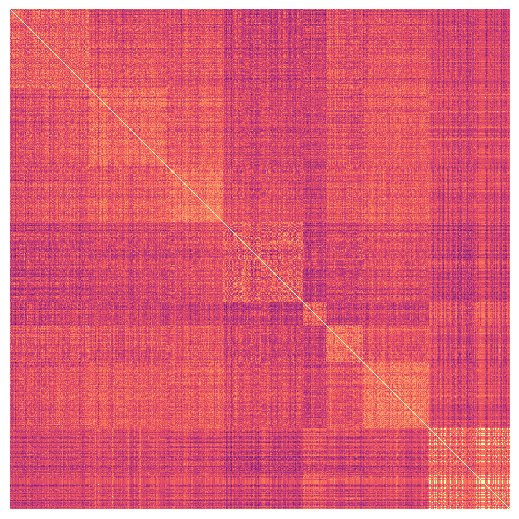

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity


adata_heatmap = adata[adata.obs['cell_type'].argsort()]
embeddings = adata_heatmap.X
similarity_matrix = cosine_similarity(embeddings, embeddings)

plt.figure(figsize=(5, 5))
sns.heatmap(
    similarity_matrix, 
    cmap="magma", 
    xticklabels=False, 
    yticklabels=False,
    cbar=False,
    cbar_kws={'shrink': 0.3, 'aspect': 5},
    # vmin=0, vmax=1  
)
# 调整布局以填满绘图区
plt.gca().set_aspect('equal', adjustable='box')  # 使得单元格为正方形
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 消除所有边距

# plt.savefig("results/annotation/heatmap_s1_trans.png", dpi=600, transparent=True)

In [6]:
plt.savefig("results/annotation/heatmap_s1.pdf")

<Figure size 640x480 with 0 Axes>

In [7]:
metric, use_rep, n_neighbors = "cosine", "X", 10
sc.pp.neighbors(adata, metric=metric, use_rep=use_rep, n_neighbors=n_neighbors)
sc.tl.umap(adata, min_dist=0.2, spread=1.0)
# sc.tl.leiden(adata, resolution=resolution, flavor="igraph", n_iterations=2)

In [3]:
adata.obs['batch'].value_counts()

batch
s4d9    4178
s4d1    2972
s4d8    2461
Name: count, dtype: int64

In [4]:
train_adata = adata[adata.obs['batch'].isin(['s4d9'])].copy()
train_adata

AnnData object with n_obs × n_vars = 4178 × 64
    obs: 'rna:GEX_n_genes_by_counts', 'rna:GEX_pct_counts_mt', 'rna:GEX_size_factors', 'rna:GEX_phase', 'rna:ADT_n_antibodies_by_counts', 'rna:ADT_total_counts', 'rna:ADT_iso_count', 'rna:cell_type', 'rna:batch', 'rna:ADT_pseudotime_order', 'rna:GEX_pseudotime_order', 'rna:Samplename', 'rna:Site', 'rna:DonorNumber', 'rna:Modality', 'rna:VendorLot', 'rna:DonorID', 'rna:DonorAge', 'rna:DonorBMI', 'rna:DonorBloodType', 'rna:DonorRace', 'rna:Ethnicity', 'rna:DonorGender', 'rna:QCMeds', 'rna:DonorSmoker', 'rna:is_train', 'adt:GEX_n_genes_by_counts', 'adt:GEX_pct_counts_mt', 'adt:GEX_size_factors', 'adt:GEX_phase', 'adt:ADT_n_antibodies_by_counts', 'adt:ADT_total_counts', 'adt:ADT_iso_count', 'adt:cell_type', 'adt:batch', 'adt:ADT_pseudotime_order', 'adt:GEX_pseudotime_order', 'adt:Samplename', 'adt:Site', 'adt:DonorNumber', 'adt:Modality', 'adt:VendorLot', 'adt:DonorID', 'adt:DonorAge', 'adt:DonorBMI', 'adt:DonorBloodType', 'adt:DonorRace', 'ad

In [5]:
test_adata = adata[~adata.obs['batch'].isin(['s4d9'])].copy()
test_adata

AnnData object with n_obs × n_vars = 5433 × 64
    obs: 'rna:GEX_n_genes_by_counts', 'rna:GEX_pct_counts_mt', 'rna:GEX_size_factors', 'rna:GEX_phase', 'rna:ADT_n_antibodies_by_counts', 'rna:ADT_total_counts', 'rna:ADT_iso_count', 'rna:cell_type', 'rna:batch', 'rna:ADT_pseudotime_order', 'rna:GEX_pseudotime_order', 'rna:Samplename', 'rna:Site', 'rna:DonorNumber', 'rna:Modality', 'rna:VendorLot', 'rna:DonorID', 'rna:DonorAge', 'rna:DonorBMI', 'rna:DonorBloodType', 'rna:DonorRace', 'rna:Ethnicity', 'rna:DonorGender', 'rna:QCMeds', 'rna:DonorSmoker', 'rna:is_train', 'adt:GEX_n_genes_by_counts', 'adt:GEX_pct_counts_mt', 'adt:GEX_size_factors', 'adt:GEX_phase', 'adt:ADT_n_antibodies_by_counts', 'adt:ADT_total_counts', 'adt:ADT_iso_count', 'adt:cell_type', 'adt:batch', 'adt:ADT_pseudotime_order', 'adt:GEX_pseudotime_order', 'adt:Samplename', 'adt:Site', 'adt:DonorNumber', 'adt:Modality', 'adt:VendorLot', 'adt:DonorID', 'adt:DonorAge', 'adt:DonorBMI', 'adt:DonorBloodType', 'adt:DonorRace', 'ad

In [11]:
adata.obs['cell_type'].value_counts()

cell_type
Reticulocyte           1813
CD4+ T activated       1776
CD14+ Mono             1769
CD4+ T naive           1728
CD8+ T naive           1236
Naive CD20+ B IGKC+     869
NK                      823
Naive CD20+ B IGKC-     599
Erythroblast            513
Name: count, dtype: int64

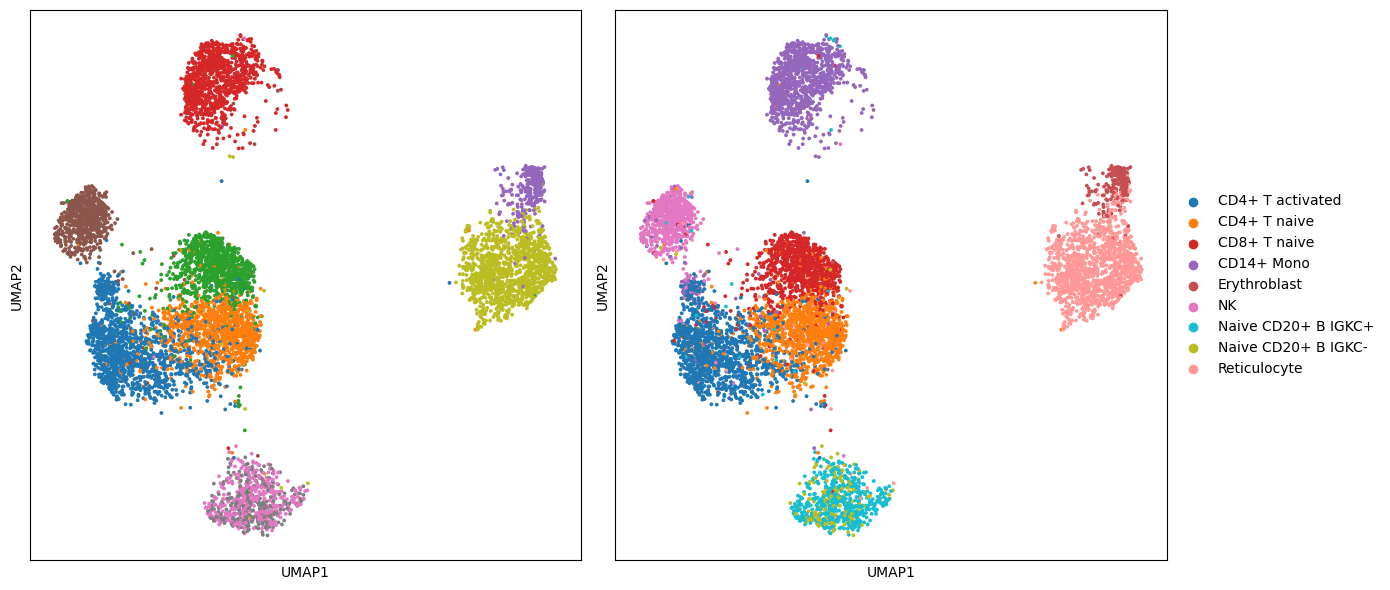

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
color_dict = {
    "CD4+ T activated": "#1f77b4",  # 蓝
    "CD4+ T naive": "#ff7f0e",      # 橙
    "CD8+ T CD57+ CD45RO+": "#2ca02c",  # 绿
    "CD8+ T naive": "#d62728",      # 红
    "CD14+ Mono": "#9467bd",        # 紫
    "Lymph prog": "#8c564b",        # 棕
    "NK": "#e377c2",                # 粉
    "Naive CD20+ B IGKC+": "#17becf",  # 浅青
    "Naive CD20+ B IGKC-": "#bcbd22",  # 黄绿
    "Proerythroblast": "#9edae5",   # 浅蓝
    "Transitional B": "#fdae6b",    # 浅橙
    "Reticulocyte": "#ff9896",      # 浅红
    "Erythroblast": "#c44e52",      # 深红

}
# 在第一个子图中绘制 train_adata 的 UMAP
sc.pl.umap(test_adata, color=['cell_type'], ax=axs[0], show=False, legend_loc=None, size=30)
axs[0].set_title('')

# 在第二个子图中绘制 test_adata 的 UMAP
sc.pl.umap(test_adata, color=['cell_type_prediction'], palette=color_dict, ax=axs[1], show=False, size=30)
axs[1].set_title('')

plt.tight_layout()
plt.show()


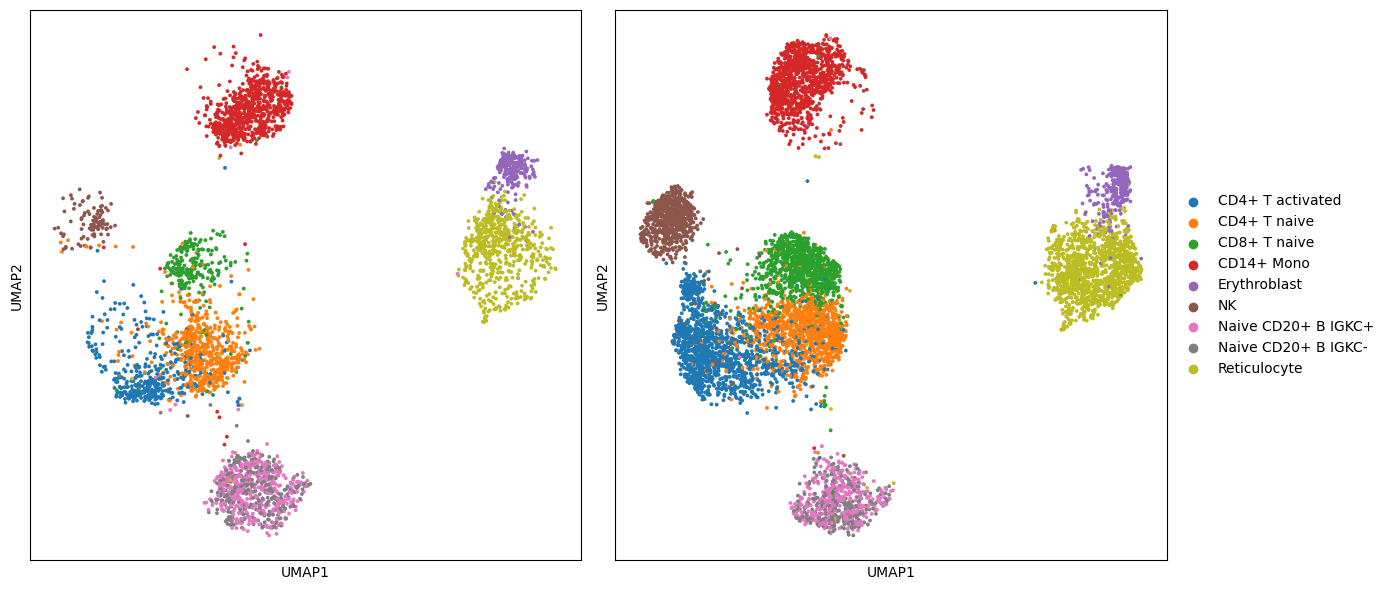

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))

# 在第一个子图中绘制 train_adata 的 UMAP
sc.pl.umap(train_adata, color=['cell_type'], ax=axs[0], palette=color_dict, show=False, legend_loc=None, size=30)
axs[0].set_title('')

# 在第二个子图中绘制 test_adata 的 UMAP
sc.pl.umap(test_adata, color=['cell_type'], ax=axs[1], palette=color_dict, show=False, size=30)
axs[1].set_title('')

plt.tight_layout()
plt.show()


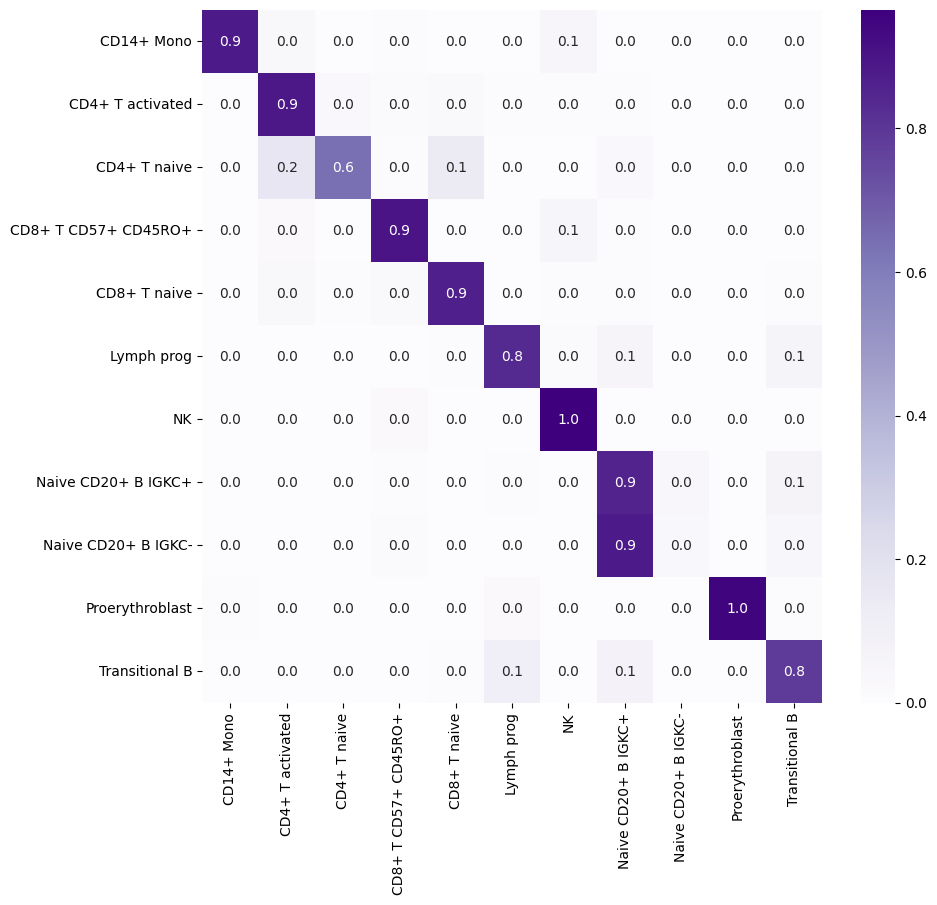

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


fig, ax = plt.subplots(1, 1, figsize=(10, 9))
# 生成混淆矩阵
cm = confusion_matrix(
    test_adata.obs['cell_type'].values, 
    test_adata.obs['cell_type_prediction'].values, 
    labels=np.unique(test_adata.obs['cell_type'].values)
)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
cm = pd.DataFrame(cm, index=np.unique(test_adata.obs['cell_type'].values), columns=np.unique(test_adata.obs['cell_type'].values))

sns.heatmap(
    cm, annot=True, fmt=".1f", 
    cmap="Purples",  # Blues
    ax=ax
)
# ax.set_xticks([])
# ax.set_yticks([])
# plt.savefig("results/annotation/confusion_matrix_s1.pdf", dpi=300)
color_dict = {
    "CD4+ T activated": "#1f77b4",  # 蓝
    "CD4+ T naive": "#ff7f0e",      # 橙
    "CD8+ T CD57+ CD45RO+": "#2ca02c",  # 绿
    "CD8+ T naive": "#d62728",      # 红
    "CD14+ Mono": "#9467bd",        # 紫
    "Lymph prog": "#8c564b",        # 棕
    "NK": "#e377c2",                # 粉
    "Naive CD20+ B IGKC+": "#17becf",  # 浅青
    "Naive CD20+ B IGKC-": "#bcbd22",  # 黄绿
    "Proerythroblast": "#9edae5",   # 浅蓝
    "Transitional B": "#fdae6b",    # 浅橙
    "Reticulocyte": "#ff9896",      # 浅红
    "Erythroblast": "#c44e52",      # 深红
}

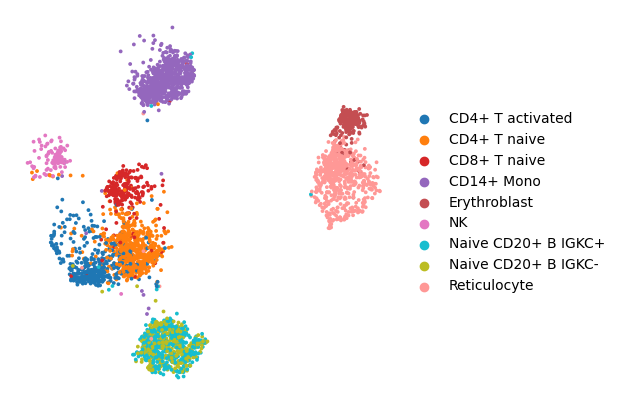

In [18]:
import os
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# color_dict = {
#     "CD4+ T activated": "#1f77b4",  # 蓝
#     "CD4+ T naive": "#ff7f0e",      # 橙
#     "CD8+ T CD57+ CD45RO+": "#2ca02c",  # 绿
#     "CD8+ T naive": "#d62728",      # 红
#     "CD14+ Mono": "#9467bd",        # 紫
#     "Lymph prog": "#8c564b",        # 棕
#     "NK": "#e377c2",                # 粉
#     "Naive CD20+ B IGKC+": "#17becf",  # 浅青
#     "Naive CD20+ B IGKC-": "#bcbd22",  # 黄绿
#     "Proerythroblast": "#9edae5",   # 浅蓝
#     "Transitional B": "#fdae6b",    # 浅橙
# }
sc.pl.umap(
    train_adata, 
    color="cell_type", 
    colorbar_loc=None,
    ax=ax, 
    show=False, 
    palette=color_dict,
    # legend_loc=None,
    size=30
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title("", fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add thick border
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.5)  # Set border thickness
fig.show()
fig.savefig(os.path.join("results/annotation", f"cite_BMMC_s1_reference.pdf"), bbox_inches='tight',
            # dpi=600, transparent=True
)

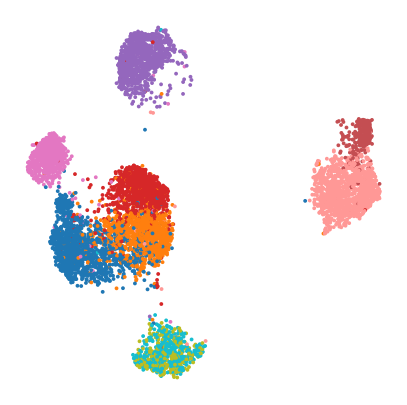

In [22]:
import os
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
sc.pl.umap(
    test_adata, 
    color="cell_type", 
    colorbar_loc=None,
    ax=ax, 
    show=False, 
    palette=color_dict,
    legend_loc=None,
    # legend_fontsize=None,
    size=30
)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title("", fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add thick border
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.5)  # Set border thickness
fig.show()
fig.savefig(os.path.join("results/annotation", f"cite_BMMC_s1_query.png"),
            dpi=600, transparent=True
)